In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Data Processing

In [4]:
df.shape

(50000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [6]:
# null check
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
# Duplicate check
df.duplicated().sum()

126

In [8]:
# Check Describe

In [9]:
df.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
df.nunique()

carat        272
cut            5
color          7
clarity        8
depth        181
table        126
price      11297
x            553
y            551
z            371
dtype: int64

# EDA

<AxesSubplot:xlabel='price', ylabel='Count'>

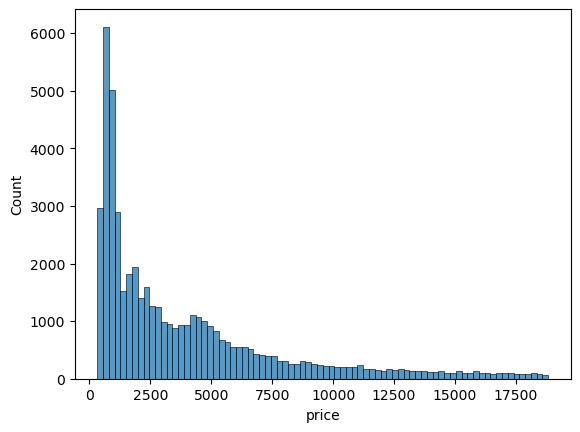

In [17]:
sns.histplot(df['price'])

#### the no.of diamonds are falls between price 0 to 2500

## Caret

<AxesSubplot:xlabel='carat', ylabel='Count'>

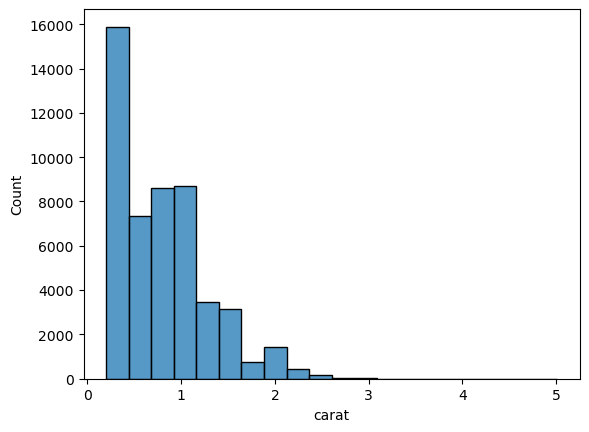

In [19]:
sns.histplot(df['carat'],bins=20)

#### no of diamonds are less then 1 carat

# Cut

In [22]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

([<matplotlib.patches.Wedge at 0x22ad1ab0ac0>,
 [Text(0.34399153713181574, 1.0448300447353582, 'Ideal'),
  Text(-1.0844184146053981, -0.1844903847486775, 'Premium'),
  Text(0.11672238556738823, -1.0937896894318662, 'Very Good'),
  Text(0.9786281106526783, -0.5022818143635797, 'Good'),
  Text(1.095150619021705, -0.10317519884340597, 'Fair')],
 [Text(0.18763174752644493, 0.5699072971283772, '39.9%'),
  Text(-0.5915009534211262, -0.10063111895382407, '25.6%'),
  Text(0.06366675576402994, -0.5966125578719269, '22.4%'),
  Text(0.5337971512650972, -0.2739718987437707, '9.1%'),
  Text(0.5973548831027482, -0.05627738118731234, '3.0%')])

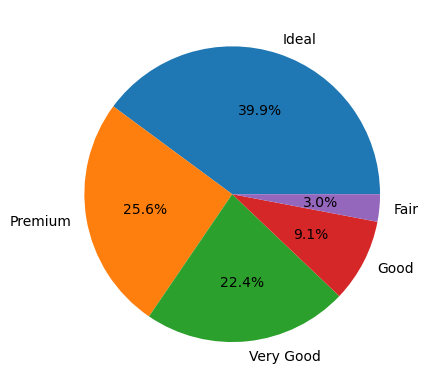

In [24]:
plt.pie(df['cut'].value_counts(),labels=['Ideal','Premium','Very Good','Good','Fair'],autopct='%1.1f%%')

#### most of the diamonds have ideal cut

# Color

<BarContainer object of 7 artists>

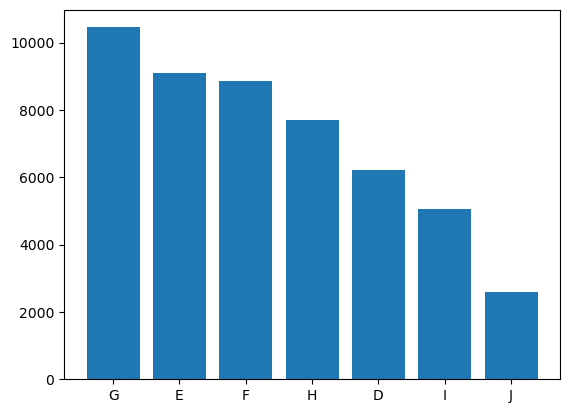

In [28]:
plt.bar(df['color'].value_counts().index,df['color'].value_counts())

##### no of diamonds have G color>e>f>h>d>i>j 

# Clarity

<BarContainer object of 8 artists>

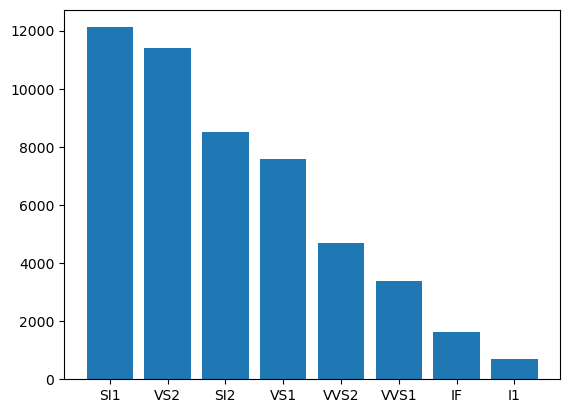

In [29]:
plt.bar(df['clarity'].value_counts().index,df['clarity'].value_counts())

#### most of the diamonds have the si1>vs2>si2>vs1>vvs2>vvs1>if>i1

# Cut And Price

<AxesSubplot:xlabel='cut', ylabel='price'>

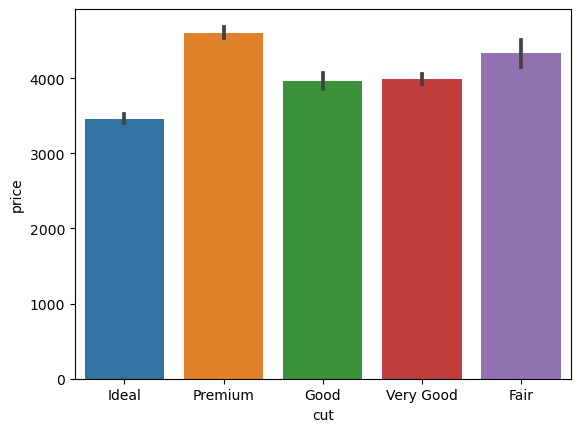

In [31]:
sns.barplot(x='cut',y='price',data=df)

#### premium and fair have the high price as compare to ideal

# Price and color

<AxesSubplot:xlabel='color', ylabel='price'>

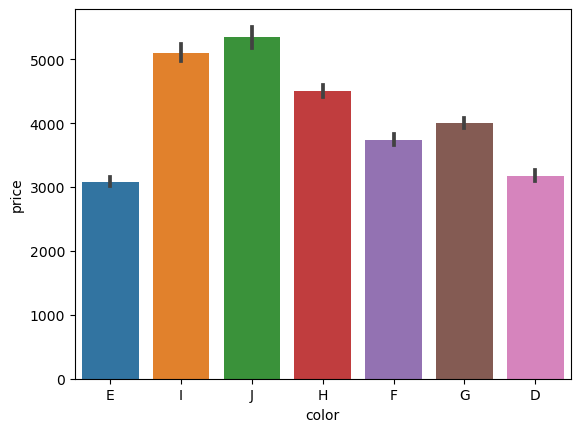

In [32]:
sns.barplot(x='color',y='price',data=df)

#### color i and j have the highest price and e nd d have the lowest price

# Clarity and price

<AxesSubplot:xlabel='clarity', ylabel='price'>

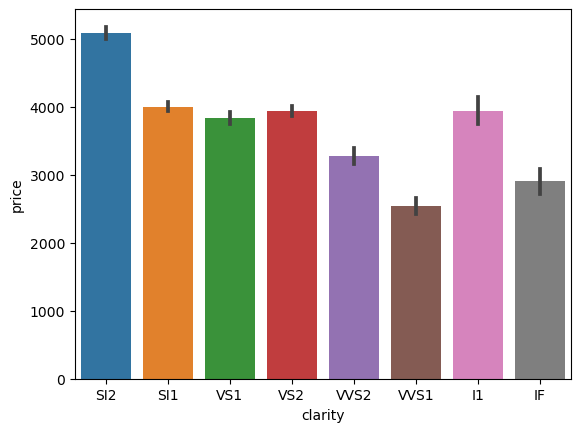

In [33]:
sns.barplot(x='clarity',y='price',data=df)

# clarity color price

<AxesSubplot:xlabel='clarity', ylabel='price'>

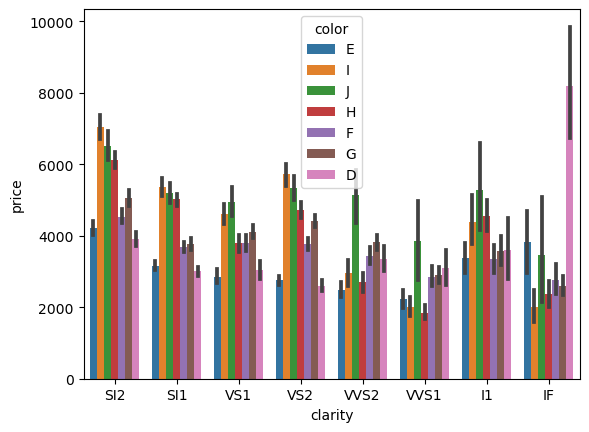

In [37]:
sns.barplot(x=df['clarity'],y=df['price'],hue=df['color'])

# color cut price

<AxesSubplot:xlabel='color', ylabel='price'>

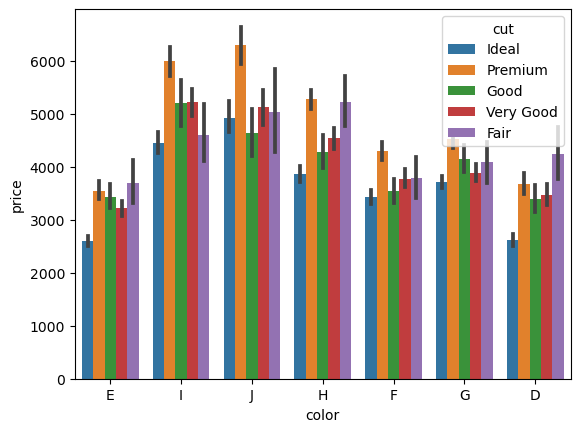

In [39]:
sns.barplot(x=df['color'],y=df['price'],hue=df['cut'])

# Data Preprocessing

In [40]:
df['cut']=df['cut'].map({'Ideal':5,'Premium':4,'Very Good':3,'Good':2,'Fair':1})
df['color'] = df['color'].map({'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1})
df['clarity'] = df['clarity'].map({'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1})

In [41]:
df.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.135135,-0.291530,-0.352435,0.027734,0.183639,0.921804,0.975037,0.950035,0.952700
cut,-0.135135,1.000000,0.019548,0.189024,-0.223898,-0.432154,-0.053537,-0.125738,-0.121335,-0.149830
color,-0.291530,0.019548,1.000000,-0.026056,-0.047426,-0.027513,-0.172629,-0.270529,-0.263395,-0.268388
clarity,-0.352435,0.189024,-0.026056,1.000000,-0.067329,-0.159967,-0.146941,-0.371355,-0.357226,-0.366218
depth,0.027734,-0.223898,-0.047426,-0.067329,1.000000,-0.293012,-0.012731,-0.025563,-0.029809,0.094337
table,0.183639,-0.432154,-0.027513,-0.159967,-0.293012,1.000000,0.129848,0.197198,0.185248,0.153161
price,0.921804,-0.053537,-0.172629,-0.146941,-0.012731,0.129848,1.000000,0.884919,0.864393,0.860963
x,0.975037,-0.125738,-0.270529,-0.371355,-0.025563,0.197198,0.884919,1.000000,0.972977,0.970122
y,0.950035,-0.121335,-0.263395,-0.357226,-0.029809,0.185248,0.864393,0.972977,1.000000,0.950030
z,0.952700,-0.149830,-0.268388,-0.366218,0.094337,0.153161,0.860963,0.970122,0.950030,1.000000


<AxesSubplot:>

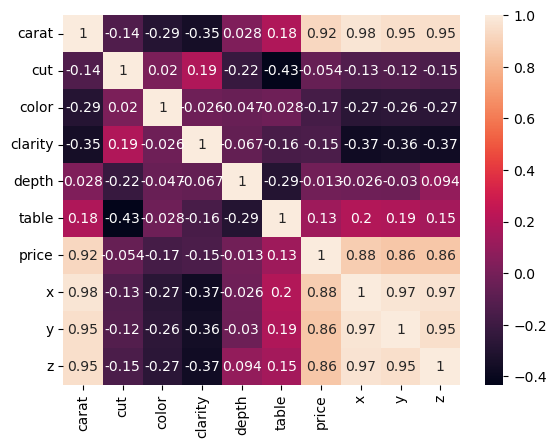

In [44]:
sns.heatmap(df.corr(),annot=True)

In [45]:
df=df.drop(columns=['x','y','z'])

<AxesSubplot:>

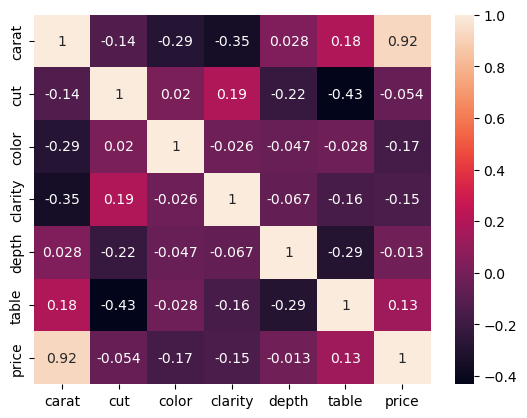

In [47]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='carat', ylabel='price'>

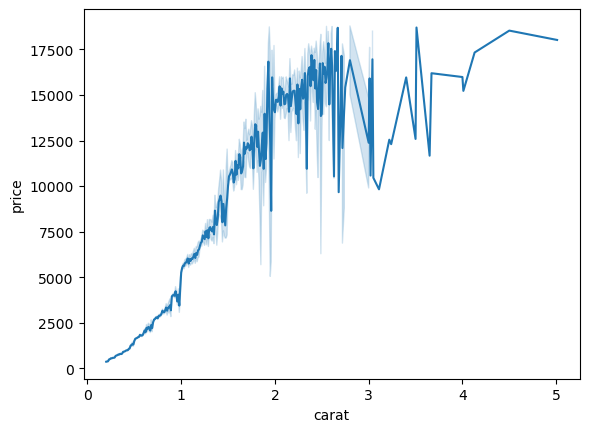

In [48]:
sns.lineplot(x='carat',y='price',data=df)

#### from above plt we can say that the carat and price have the linear relationship

# Train Test split

In [50]:
X=df.drop(columns='price')
y=df['price']

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

# Model Building

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
dtr=DecisionTreeRegressor()
rft=RandomForestRegressor()

In [53]:
dtr.fit(X_train,y_train)
dtr.score(X_train,y_train)

0.9998254197853154

In [54]:
rft.fit(X_train,y_train)
rft.score(X_train,y_train)

0.9971568346569765

In [55]:
dtr_pred=dtr.predict(X_test)
rft_pred=rft.predict(X_test)

In [56]:
from sklearn.metrics import r2_score

In [57]:
r2_score(y_test,dtr_pred)

0.9672900435216285

In [58]:
r2_score(y_test,rft_pred)

0.9804719105971281

In [59]:
score=pd.DataFrame({
    'Actual':y_test,
    'predicted':rft_pred
})

In [63]:
score.reset_index(drop=True,inplace=True)
score.head()

,Actual,predicted
0,931,1150.830000
1,4744,4206.868333
2,2781,2834.855000
3,5531,4626.245000
4,505,531.633333


In [64]:
import pickle
pickle.dump(rft,open('rft.pkl','wb'))

In [65]:
pickle.dump(dtr,open('dtr.pkl','wb'))